In [138]:
import pandas as pd
import numpy as np

In [139]:
from pymongo import MongoClient

# Replace with your connection string
uri = "mongodb://localhost:27017/"

# Connect to MongoDB
client = MongoClient(uri)

# List databases
print(client.list_database_names())

['admin', 'config', 'local', 'sticker_sales']


In [140]:
# Select your database
db = client["sticker_sales"]
print(db.list_collection_names())

['train_data', 'test_data', 'system.views']


In [141]:
collection = db["train_data"]

In [142]:
import pandas as pd

# Convert collection to DataFrame
data = list(collection.find())
df = pd.DataFrame(data)

# Drop MongoDB's default `_id` field
df.drop(columns=["_id"], inplace=True)

In [143]:
df.shape

(230130, 6)

In [144]:
df.dtypes

id           int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [145]:
df.describe()

id       num_sold
count  230130.000000  230130.000000
mean   115064.500000     723.519124
std     66432.953062     692.065736
min         0.000000       0.000000
25%     57532.250000     184.000000
50%    115064.500000     575.000000
75%    172596.750000    1084.000000
max    230129.000000    5939.000000

In [146]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [147]:
df.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [148]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['date'].head()

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: date, dtype: datetime64[ns]

In [149]:
df['product'].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [150]:
df['year'] = df['date'].dt.year

In [151]:
df

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year  
0        Holographic Goose         0  2010  
1                   Kaggle       973  2010  
2             Kaggle Tiers       906  2010  
3                 Kerneler       423  2010  
4       Kerneler Dark Mode       491  2010  
...                    ...       ...   ...  
230125   Holographic Goose       466  2016  
230126              Kaggle      2907  2016  
230127        Kaggle Tiers      2299  2016  
230128            Kerneler      1242  2016  
230129  Kerneler Dark Mode      1622  2016  

[230130 rows x 7 columns]

In [152]:
df['year'].value_counts()

year
2012    32940
2016    32940
2010    32850
2011    32850
2013    32850
2014    32850
2015    32850
Name: count, dtype: int64

In [153]:
df['month'] = df['date'].dt.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [154]:
df['day'] = df['date'].dt.day_of_week.map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [155]:
df

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year month  day  
0        Holographic Goose         0  2010   Jan  Fri  
1                   Kaggle       973  2010   Jan  Fri  
2             Kaggle Tiers       906  2010   Jan  Fri  
3                 Kerneler       423  2010   Jan  Fri  
4       Kerneler Dark Mode       491  2010   Jan  Fri  
...                    ...       ...   ...   ...  ...  
230125   Holographic Goose       466  2016   Dec  Sat  
230126              Kaggle      2907  2016   Dec  Sat  
230127        Kaggle Tiers      2299  2016   Dec  Sat  
230128            Kerneler      1242  2016   Dec  Sat  
230129  Kerneler Dark Mode      1622  2016   Dec  Sat  

[230130 rows x 9 columns]

In [156]:
print(f"Number of missing num_sold rows: {df['num_sold'].isna().sum()}")

Number of missing num_sold rows: 0


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all(df):
    f,axes = plt.subplots(3,2,figsize=(25,25), sharex = True, sharey=True)
    f.tight_layout()
    for n,prod in enumerate(df["product"].unique()):
        plot_df = df.loc[df["product"] == prod]
        sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=axes[n//2,n%2])
        axes[n//2,n%2].set_title("Product: "+str(prod))

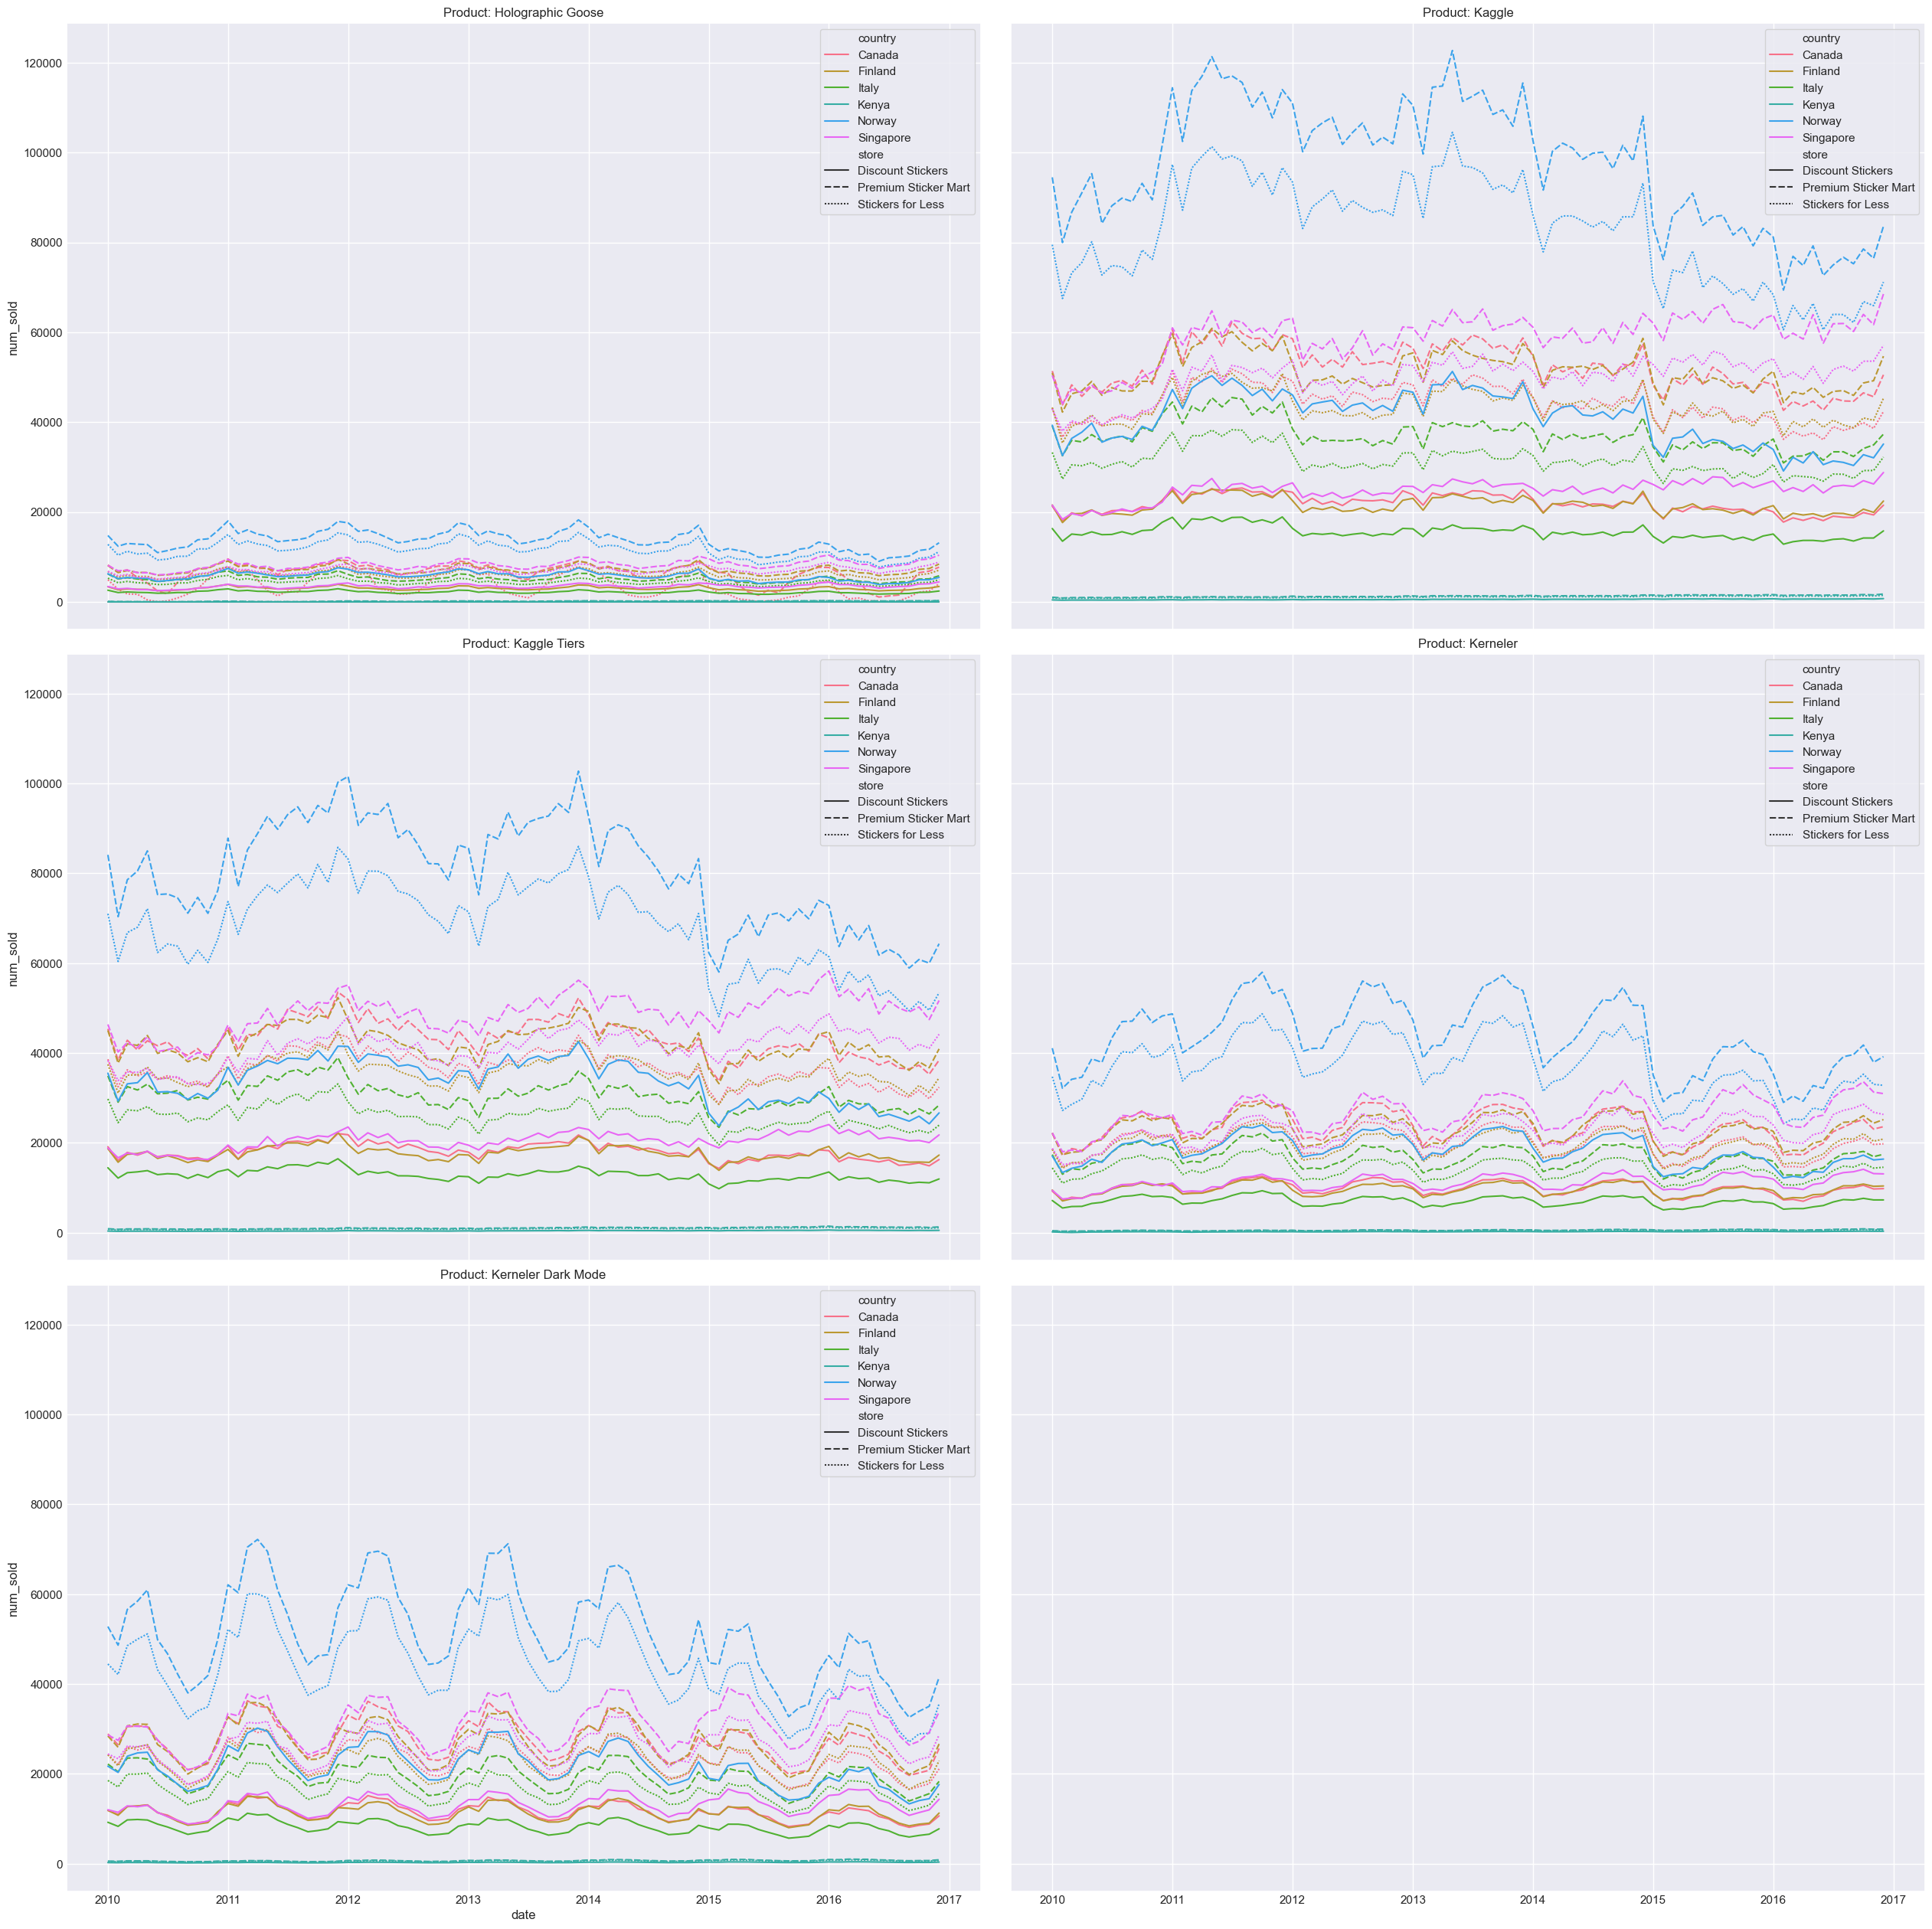

In [159]:
plot_all(monthly_df)

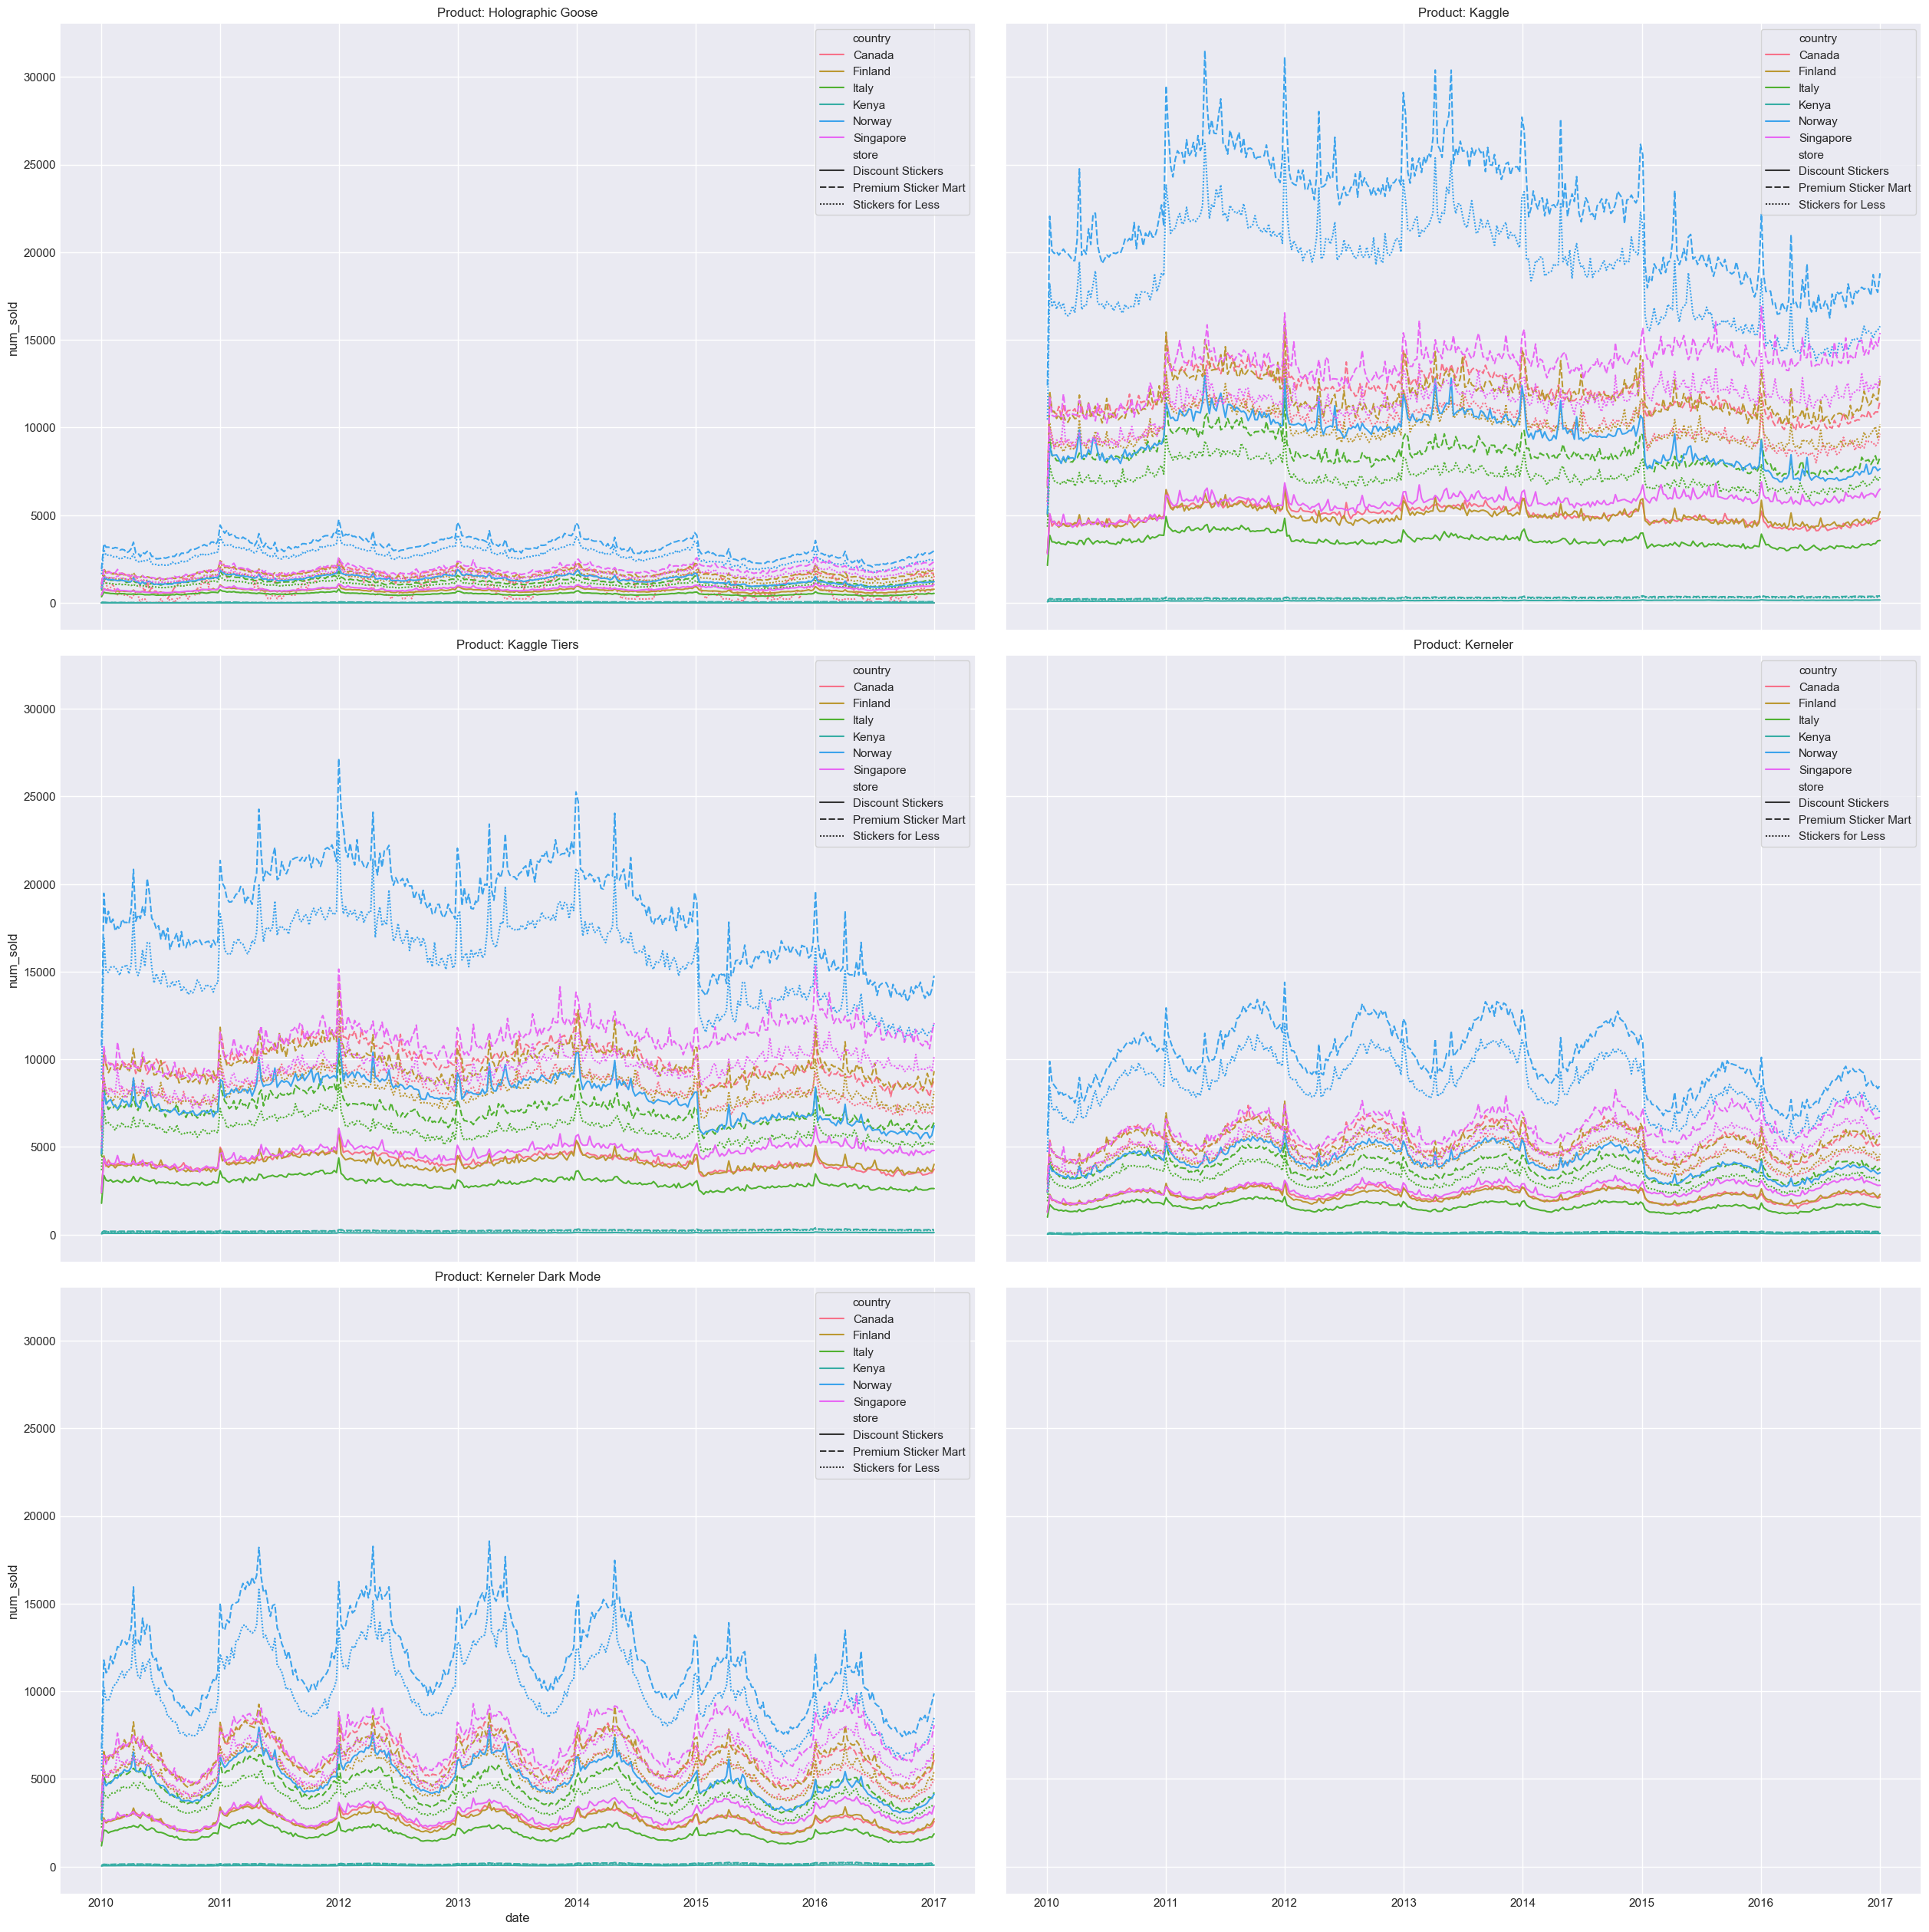

In [160]:
plot_all(weekly_df)

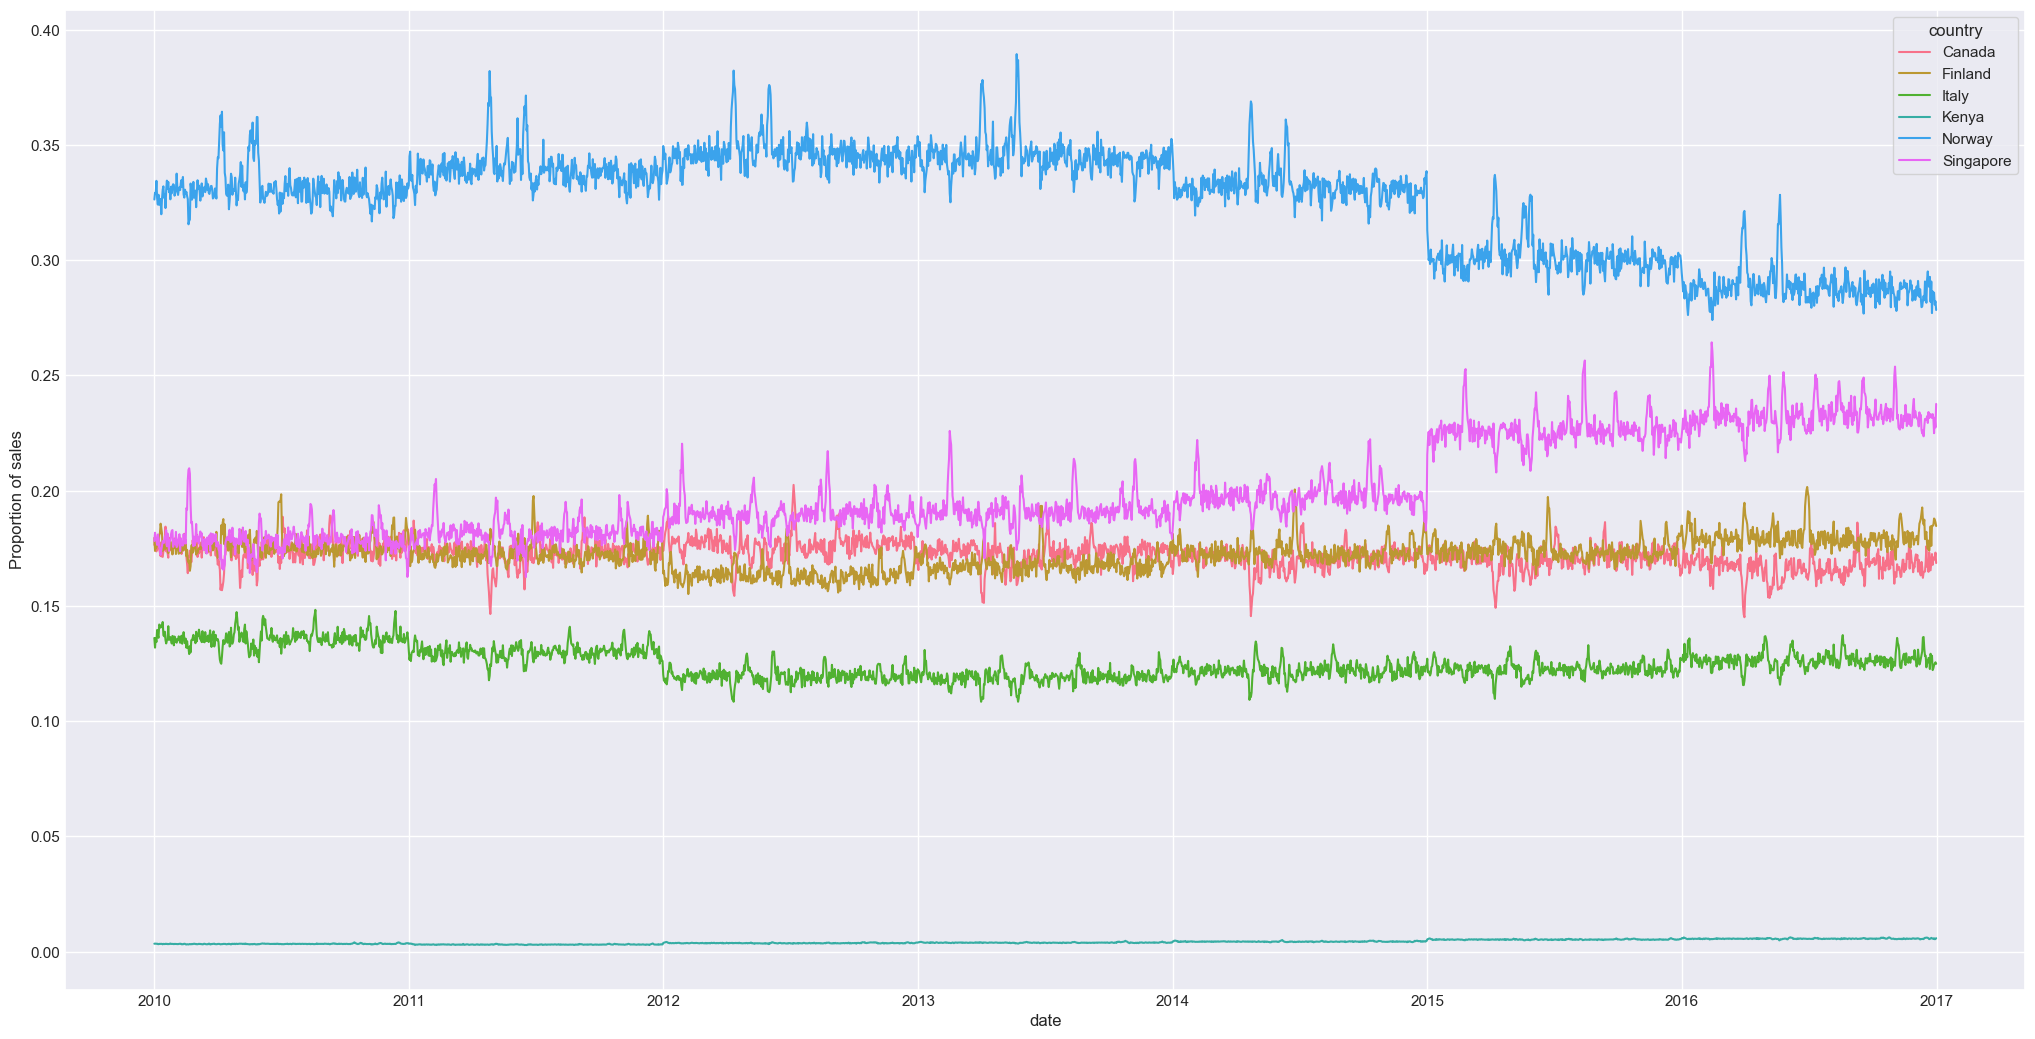

In [161]:
country_weights = df.groupby("country")["num_sold"].sum()/df["num_sold"].sum()
country_weights
country_ratio_over_time = (df.groupby(["date","country"])["num_sold"].sum() / df.groupby(["date"])["num_sold"].sum()).reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = country_ratio_over_time, x="date", y="num_sold", hue="country");
ax.set_ylabel("Proportion of sales");


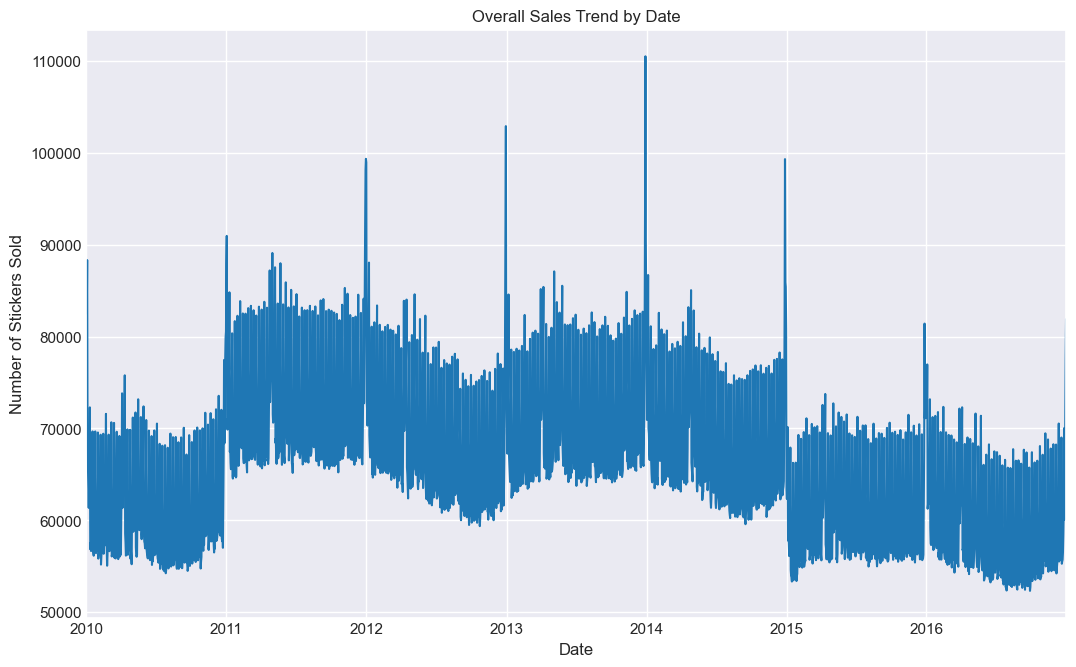

In [162]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], dayfirst=True)  # Assumes day comes before month
df.groupby('date')['num_sold'].sum().plot(figsize=(10, 6))
plt.title("Overall Sales Trend by Date")
plt.xlabel("Date")
plt.ylabel("Number of Stickers Sold")
plt.show()


C:\Users\dines\AppData\Local\Temp\ipykernel_18360\3650271530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_sales.index, y=country_sales.values, palette='magma')


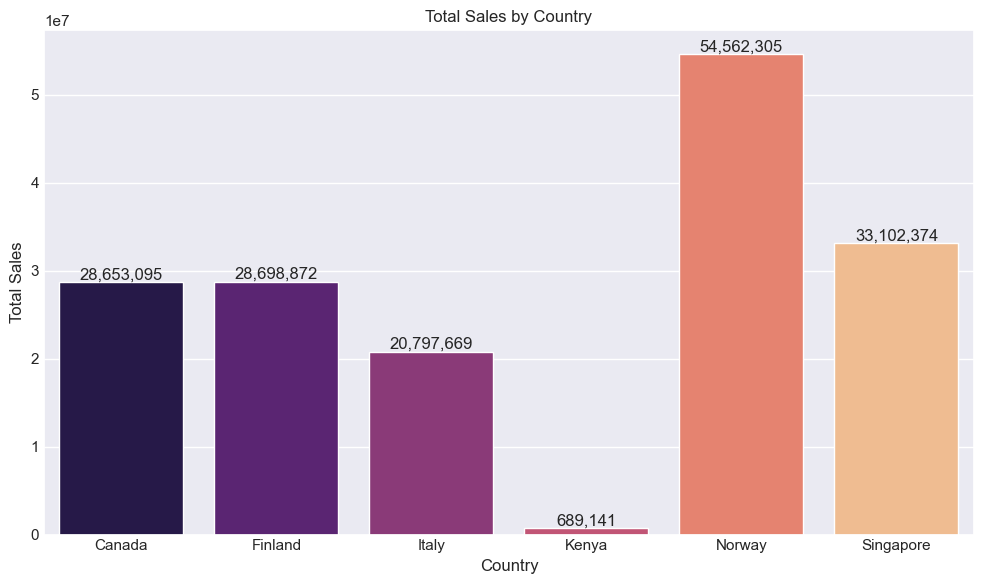

In [163]:
country_sales = df.groupby('country')['num_sold'].sum()

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=country_sales.index, y=country_sales.values, palette='magma')
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")

# Adding values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\dines\AppData\Local\Temp\ipykernel_18360\4190975132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=store_sales.index, y=store_sales.values, palette='magma')


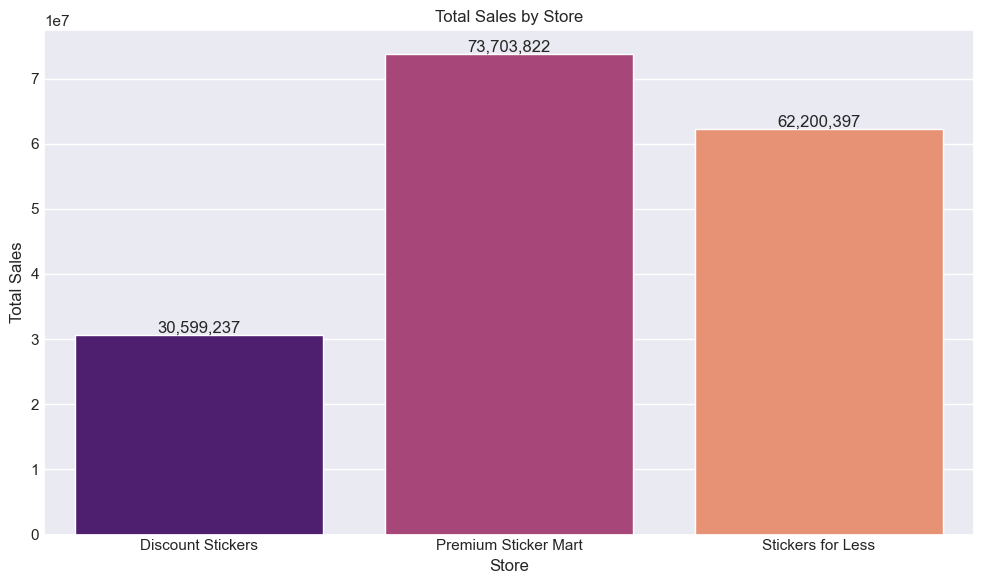

In [164]:
store_sales = df.groupby('store')['num_sold'].sum()

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=store_sales.index, y=store_sales.values, palette='magma')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")

# Adding values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [165]:
df

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year month  day  
0        Holographic Goose         0  2010   Jan  Fri  
1                   Kaggle       973  2010   Jan  Fri  
2             Kaggle Tiers       906  2010   Jan  Fri  
3                 Kerneler       423  2010   Jan  Fri  
4       Kerneler Dark Mode       491  2010   Jan  Fri  
...                    ...       ...   ...   ...  ...  
230125   Holographic Goose       466  2016   Dec  Sat  
230126              Kaggle      2907  2016   Dec  Sat  
230127        Kaggle Tiers      2299  2016   Dec  Sat  
230128            Kerneler      1242  2016   Dec  Sat  
230129  Kerneler Dark Mode      1622  2016   Dec  Sat  

[230130 rows x 9 columns]

In [166]:
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df['quarter'] = df['date'].dt.quarter

In [167]:
df.drop(columns=['weekday'], inplace=True)

In [168]:
df.head()

id       date country              store             product  num_sold  \
0   0 2010-01-01  Canada  Discount Stickers   Holographic Goose         0   
1   1 2010-01-01  Canada  Discount Stickers              Kaggle       973   
2   2 2010-01-01  Canada  Discount Stickers        Kaggle Tiers       906   
3   3 2010-01-01  Canada  Discount Stickers            Kerneler       423   
4   4 2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode       491   

   year month  day  is_weekend  quarter  
0  2010   Jan  Fri       False        1  
1  2010   Jan  Fri       False        1  
2  2010   Jan  Fri       False        1  
3  2010   Jan  Fri       False        1  
4  2010   Jan  Fri       False        1

C:\Users\dines\AppData\Local\Temp\ipykernel_18360\4011881271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=quarter_sales.index, y=quarter_sales.values, palette='magma')


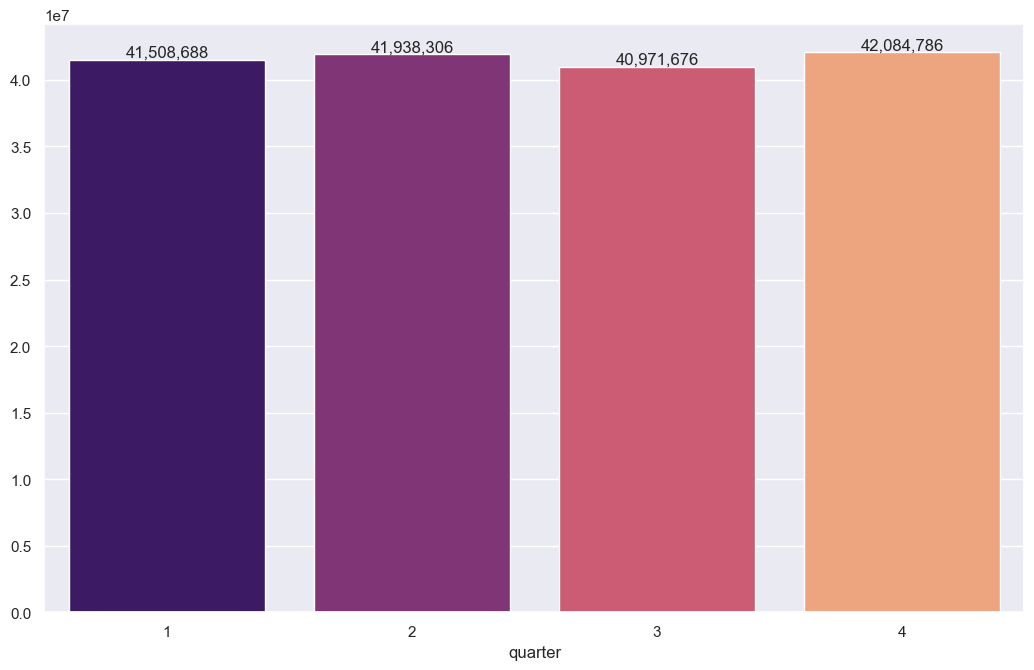

In [196]:
quarter_sales = df.groupby('quarter')['num_sold'].sum()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=quarter_sales.index, y=quarter_sales.values, palette='magma')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

C:\Users\dines\AppData\Local\Temp\ipykernel_18360\1329162122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette='magma')


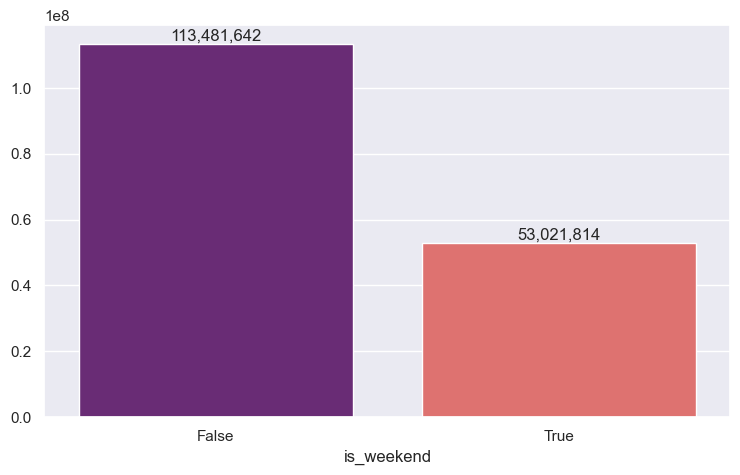

In [195]:
weekend_sales = df.groupby('is_weekend')['num_sold'].sum()
plt.figure(figsize=(7,4))
ax = sns.barplot(x=weekend_sales.index, y=weekend_sales.values, palette='magma')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

In [171]:
df['num_sold'].describe()

count    230130.000000
mean        723.519124
std         692.065736
min           0.000000
25%         184.000000
50%         575.000000
75%        1084.000000
max        5939.000000
Name: num_sold, dtype: float64

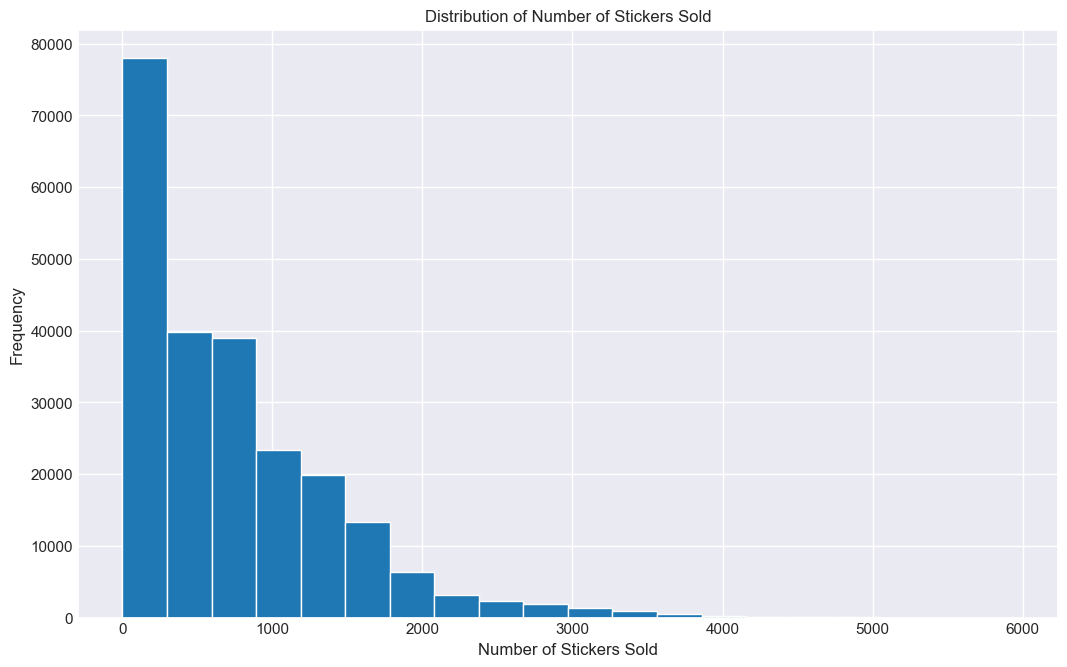

In [172]:
df['num_sold'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title("Distribution of Number of Stickers Sold")
plt.xlabel("Number of Stickers Sold")
plt.ylabel("Frequency")
plt.show()

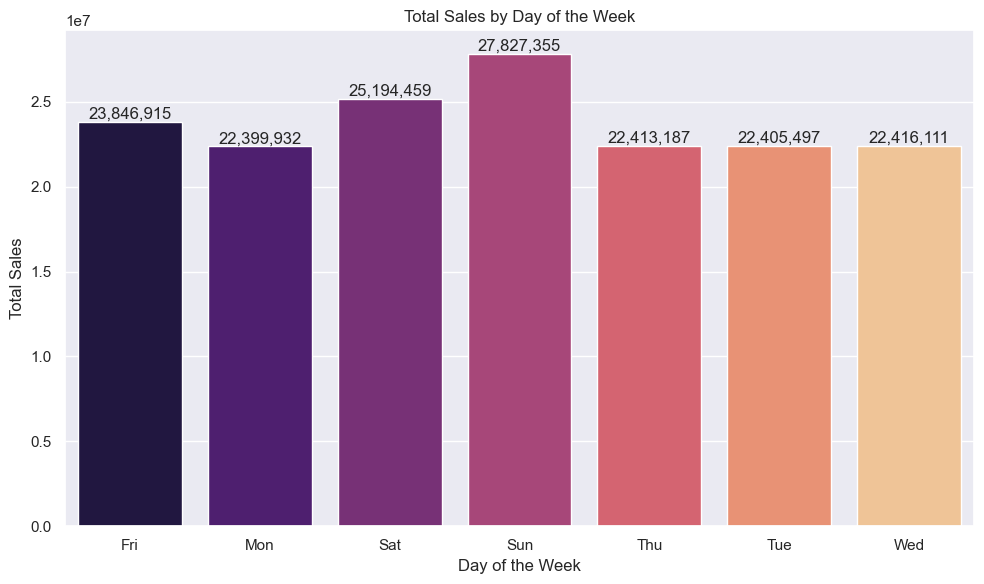

In [194]:
day_sales = df.groupby('day')['num_sold'].sum()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_sales.index, y=day_sales.values, hue=day_sales.index, palette='magma', legend=False)

plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [174]:
df

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year month  day  is_weekend  quarter  
0        Holographic Goose         0  2010   Jan  Fri       False        1  
1                   Kaggle       973  2010   Jan  Fri       False        1  
2             Kaggle Tiers       906  2010   Jan  Fri       False        1  
3                 Kerneler       423  2010   Jan  Fri       False        1  
4       Kerneler Dark Mode       491  2010   Jan  Fri       False        1  
...                    ...       ...   ...   ...  ...         ...      ...  
230125   Holographic Goose       466  2016   Dec  Sat        True        4  
230126              Kaggle      2907  2016   Dec  Sat        True        4  
230127        Kaggle Tiers      2299  2016   Dec  Sat        True        4  
230128            Kerneler      1242  2016   Dec  Sat        True        4  
230129  Kerneler Dark Mode      1622  2016   Dec  Sat        True        4  

[230130 rows x 11 columns]

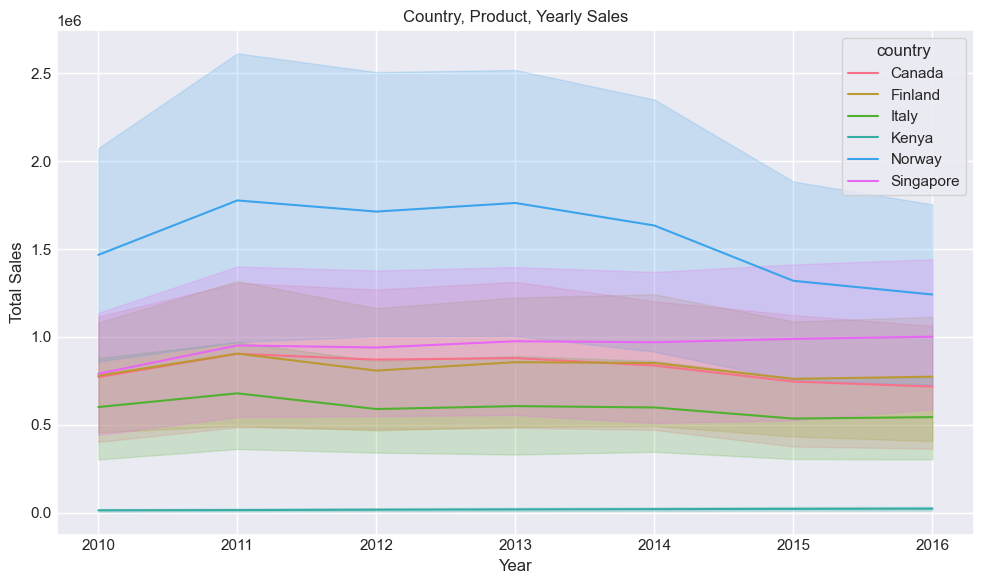

In [175]:
# Plot Country, product, year, num_sold time series sales
country_product_year_sales = df.groupby(['country', 'product', 'year'])['num_sold'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=country_product_year_sales, x='year', y='num_sold', hue='country', markers=True)
plt.title("Country, Product, Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

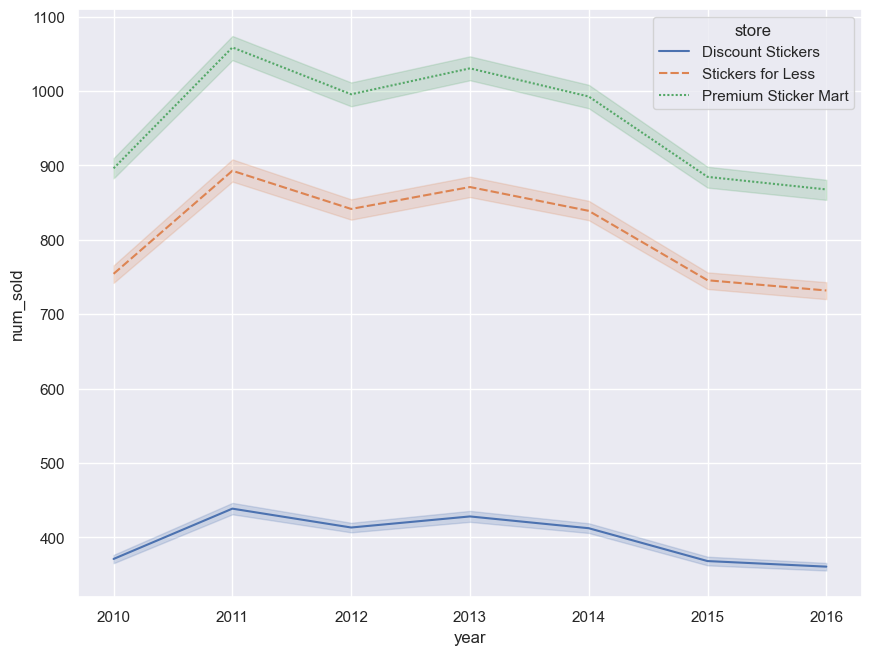

In [190]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
# Plot the responses for different events and regions
ax = sns.lineplot(x="year", y="num_sold",
             hue="store", style="store",
             data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')


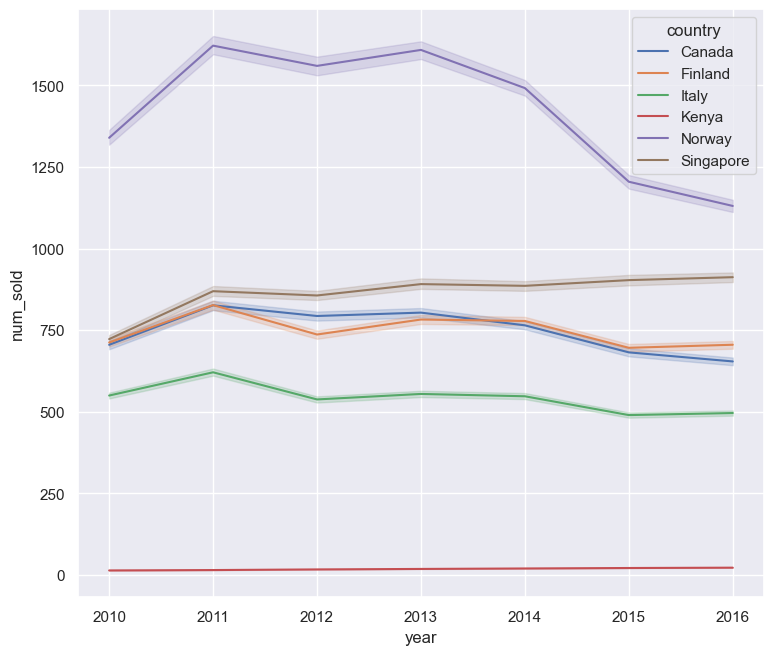

In [188]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 6))
# Plot the responses for different events and regions
ax = sns.lineplot(x="year", y="num_sold",
             hue="country",
             data=df)


C:\Users\dines\AppData\Local\Temp\ipykernel_18360\3869937008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kenya_sales.index, y=kenya_sales.values, palette='magma')


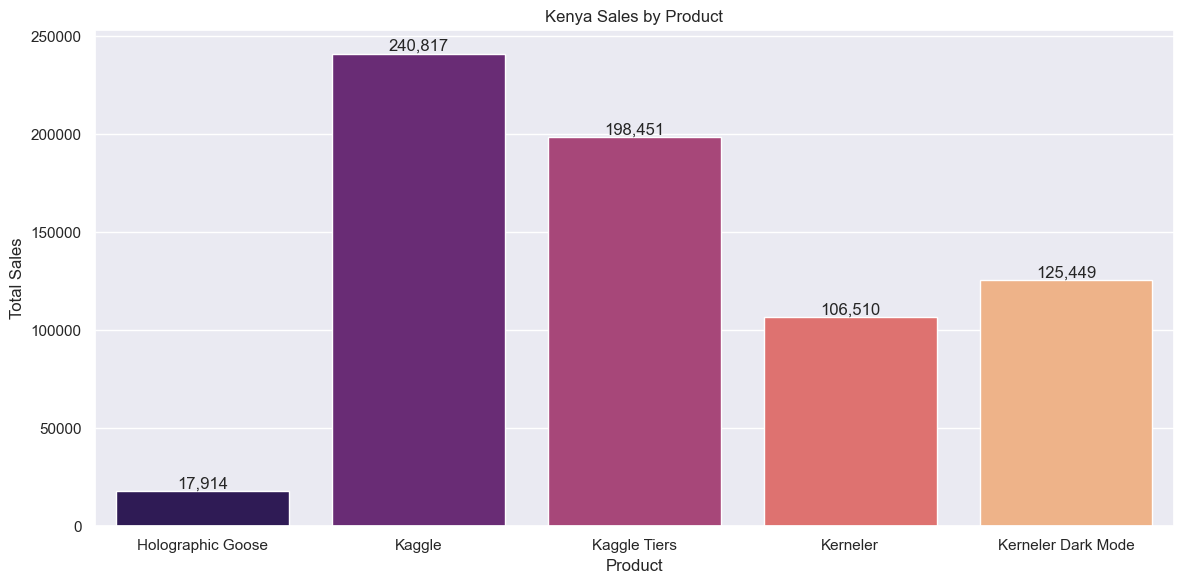

In [185]:
kenya_sales = df[df['country'] == 'Kenya'].groupby('product')['num_sold'].sum()
plt.figure(figsize=(12, 6))
# Add title and labels
ax = sns.barplot(x=kenya_sales.index, y=kenya_sales.values, palette='magma')
plt.title("Kenya Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [179]:
df

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  year month  day  is_weekend  quarter  
0        Holographic Goose         0  2010   Jan  Fri       False        1  
1                   Kaggle       973  2010   Jan  Fri       False        1  
2             Kaggle Tiers       906  2010   Jan  Fri       False        1  
3                 Kerneler       423  2010   Jan  Fri       False        1  
4       Kerneler Dark Mode       491  2010   Jan  Fri       False        1  
...                    ...       ...   ...   ...  ...         ...      ...  
230125   Holographic Goose       466  2016   Dec  Sat        True        4  
230126              Kaggle      2907  2016   Dec  Sat        True        4  
230127        Kaggle Tiers      2299  2016   Dec  Sat        True        4  
230128            Kerneler      1242  2016   Dec  Sat        True        4  
230129  Kerneler Dark Mode      1622  2016   Dec  Sat        True        4  

[230130 rows x 11 columns]

In [180]:
df.dtypes

id                     int64
date          datetime64[ns]
country               object
store                 object
product               object
num_sold               int64
year                   int32
month                 object
day                   object
is_weekend              bool
quarter                int32
dtype: object

In [182]:
df.head()

id       date country              store             product  num_sold  \
0   0 2010-01-01  Canada  Discount Stickers   Holographic Goose         0   
1   1 2010-01-01  Canada  Discount Stickers              Kaggle       973   
2   2 2010-01-01  Canada  Discount Stickers        Kaggle Tiers       906   
3   3 2010-01-01  Canada  Discount Stickers            Kerneler       423   
4   4 2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode       491   

   year month  day  is_weekend  quarter  
0  2010   Jan  Fri       False        1  
1  2010   Jan  Fri       False        1  
2  2010   Jan  Fri       False        1  
3  2010   Jan  Fri       False        1  
4  2010   Jan  Fri       False        1

In [200]:
collection2 = db['test_data']

In [201]:
import pandas as pd

# Convert collection to DataFrame
data = list(collection.find())
test_df = pd.DataFrame(data)

# Drop MongoDB's default `_id` field
test_df.drop(columns=["_id"], inplace=True)

In [203]:
test_df.shape

(230130, 6)

In [205]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        230130 non-null  int64 
 1   date      230130 non-null  object
 2   country   230130 non-null  object
 3   store     230130 non-null  object
 4   product   230130 non-null  object
 5   num_sold  230130 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 10.5+ MB


In [209]:
df

Empty DataFrame
Columns: [id, date, country, store, product, num_sold, year, month, day, is_weekend, quarter]
Index: []

In [ ]:
test_df['date'] = pd.to_datetime(test_df['date'], dayfirst=True)

In [207]:
df['year'] = df['date'].dt.year

In [208]:
test_df['month'] = test_df['date'].dt.month.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Convert 'month' to numbers
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['month'] = df['month'].map(month_map)

# 2️⃣ Convert 'day' (weekday names) to numbers
day_map = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
df['day'] = df['day'].map(day_map)

# 3️⃣ Drop rows with missing values (optional)
df = df.dropna()

# 4️⃣ Encode categorical variables
categorical_cols = ['country', 'store', 'product']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])  

# 5️⃣ Define features (X) and target (y)
X_train = df.drop(columns=['num_sold', 'date', 'id'])  # Drop unnecessary columns
y_train = df['num_sold']

# 6️⃣ Scale numerical features
scaler = StandardScaler()
X_train[['year', 'month', 'day', 'quarter']] = scaler.fit_transform(X_train[['year', 'month', 'day', 'quarter']])

# 7️⃣ Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8️⃣ Load Your Separate Test Set
X_test = test_df.drop(columns=['num_sold', 'date', 'id'])  
y_test = test_df['num_sold']

# Scale the test data
X_test[['year', 'month', 'day', 'quarter']] = scaler.transform(X_test[['year', 'month', 'day', 'quarter']])

# 9️⃣ Model Prediction
y_pred = model.predict(X_test)

# 🔟 Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 Model Performance:")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.